In [10]:
## import necessary libraries
import pandas as pd

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import io
from sklearn.model_selection import train_test_split



#### Loading data

In [12]:
##load the train data
train = pd.read_csv("train.csv",keep_default_na=False)

In [13]:
#from google.colab import files
#uploaded = files.upload()

## Data Preparation

In [14]:
## check any values of NAN
train.isna().sum().any()

False

In [15]:
## checking for negative values in data
train[(train<0).all(1)]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783


In [16]:
### as traindata is huge and test data has no label to evaluate the model we will split
## the train data into train and test
train_sample,train_subsample = train_test_split(train,test_size = 0.2, random_state = 4)

In [17]:
## this would be the test data(80% of the train data)
train_sample.shape

(33600, 785)

In [18]:
### this would be the 20% of the train data to train the model
train_subsample.shape


(8400, 785)

In [19]:
## considering only 20% data to train the data
#train_subsample = pd.read_csv(io.BytesIO(uploaded['digitrecognisersample.csv']))

In [20]:
#train_subsample =pd.read_csv("digitrecognisersample.csv")

In [21]:
## spliting into X and Y
X = train_subsample.drop("label", axis = 1)
y = train_subsample.label.values.astype(int)


In [32]:
## Spliting the test data
Xtest = train_sample.drop("label", axis = 1)
ytest = train_sample.label.values.astype(int)

In [22]:
## scale the data 
from sklearn.preprocessing import scale

In [23]:
X = scale(X)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [33]:
### Scale the test data
Xtest = scale(Xtest)


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


In [24]:
###split into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

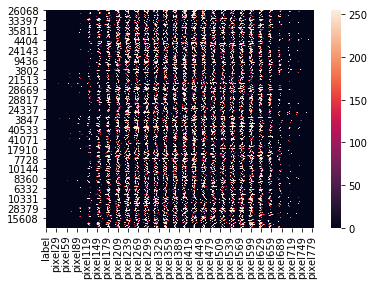

In [25]:
### Multicolinearity is very important in SVM
## lets visualize using heat map
sns.heatmap(train_subsample)

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Model Building

In [27]:
# instantiate an object of class SVC()
# note that we are using cost C=1
model = SVC(C = 1,kernel='rbf')

# fit
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Model Evaluation Metrics

In [28]:
## model evaluation metrics
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       249
           1       0.97      0.98      0.97       272
           2       0.83      0.94      0.88       263
           3       0.89      0.88      0.88       253
           4       0.93      0.96      0.94       224
           5       0.92      0.87      0.89       210
           6       0.96      0.93      0.94       262
           7       0.94      0.93      0.93       264
           8       0.96      0.89      0.92       245
           9       0.92      0.90      0.91       278

   micro avg       0.92      0.92      0.92      2520
   macro avg       0.92      0.92      0.92      2520
weighted avg       0.92      0.92      0.92      2520



## Grid search to find optimal hyperparameters

In [15]:
from sklearn.model_selection import KFold

## creating Kfold object with 5 splits
folds = KFold(n_splits=5,shuffle = True,random_state=4)

##Specify a range for hyper parameters
hyper_param = [{'gamma':[0.001,0.002,0.005],'C':[1,5,10]}]

#specify a model
model = SVC(kernel='poly')

##set up using GridSerachCV()
model_cv = GridSearchCV(estimator = model,
                        param_grid = hyper_param,
                        scoring = 'accuracy',
                        cv = folds,
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score = True)
#fit the model 

model_cv.fit(X_train,y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 13.9min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'gamma': [0.001, 0.002, 0.005], 'C': [1, 5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [16]:
# # printing the optimal accuracy score and hyperparameters
cv_results = pd.DataFrame(model_cv.cv_results_)
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9428571428571428 corresponding to hyperparameters {'C': 10, 'gamma': 0.002}


In [ ]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.002]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.002")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
#plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.005]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.005")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


### Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [29]:
### Special hyper parameters
modelbest = SVC(C=10, gamma=0.002, kernel="poly")
modelbest.fit(X_train, y_train)
y_pred = modelbest.predict(X_test)

# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred,average = 'weighted'))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred,average='weighted'))

[[242   0   0   1   1   3   1   0   1   0]
 [  0 267   1   0   1   0   0   1   2   0]
 [  1   2 241   4   1   1   1   3   6   3]
 [  0   0   3 235   1   4   0   0   7   3]
 [  0   0   1   0 219   1   0   1   1   1]
 [  0   0   1   6   2 197   1   0   3   0]
 [  2   1   1   0   3   5 248   0   2   0]
 [  0   1   2   1   0   0   0 246   2  12]
 [  1   0   0   2   3   7   0   0 232   0]
 [  3   0   0   6   6   1   0   2   4 256]] 

accuracy 0.9456349206349206
precision 0.9466420015544162
sensitivity/recall 0.9456349206349206


In [30]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       249
           1       0.99      0.98      0.98       272
           2       0.96      0.92      0.94       263
           3       0.92      0.93      0.93       253
           4       0.92      0.98      0.95       224
           5       0.90      0.94      0.92       210
           6       0.99      0.95      0.97       262
           7       0.97      0.93      0.95       264
           8       0.89      0.95      0.92       245
           9       0.93      0.92      0.93       278

   micro avg       0.95      0.95      0.95      2520
   macro avg       0.94      0.95      0.95      2520
weighted avg       0.95      0.95      0.95      2520



In [34]:
### testing with test data

y_pred_test = modelbest.predict(Xtest)

# metrics
print(metrics.confusion_matrix(ytest, y_pred_test), "\n")
print("accuracy", metrics.accuracy_score(ytest, y_pred_test))
print("precision", metrics.precision_score(ytest, y_pred_test,average = 'weighted'))
print("sensitivity/recall", metrics.recall_score(ytest, y_pred_test,average='weighted'))

[[3220    0    5    3    8   16   21    1   22    2]
 [   0 3707    9   11    9    2    4    3   28    4]
 [   8   10 3117   26   39    4    4   27   95    4]
 [   2    1   33 3265    5   50    1   16  108   19]
 [   2    6    8    0 3216    3    6   11    4   55]
 [   5    1    5   65   23 2838   24    6   43   32]
 [  15    1    9    0   40   50 3139    1   24    0]
 [   2   15   22    9   67    2    0 3262   12  112]
 [  15    6   11   31   18   51    6    7 3090   25]
 [   4    4   16   39   90    8    0   50   23 3062]] 

accuracy 0.9498809523809524
precision 0.950610501842536
sensitivity/recall 0.9498809523809524
